In [74]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, GlobalMaxPooling2D, Conv2D , Dropout
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn

In [75]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "faceClassifier.h5"

# Data
training_data_dir = "/home/bhatakti-atama/PycharmProjects/internHack/trainSetStdTrialWork"
validation_data_dir = "/home/bhatakti-atama/PycharmProjects/internHack/trainSetStdTrialRef"


In [76]:

IMAGE_SIZE = 160
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 5
BATCH_SIZE = 64
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [77]:
model = Sequential()
efficient_net = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
efficient_net.trainable = False
model.add(efficient_net)
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling2D())
model.add(Dense(1013, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

'\nefficient_net = efn.EfficientNetB0(weights=\'imagenet\', include_top=False, input_shape=input_shape)\n#efficient_net.trainable = False\nfor index, layer in enumerate(efficient_net.layers):\n    if index < 761:\n        layer.trainable = False\n\n    print(index)\n    print(layer)\nmodel.add(efficient_net)\n#model.add(GlobalMaxPooling2D())\nmodel.add(Dense(1024, activation=\'relu\'))\nmodel.add(Flatten())\n# if dropout_rate > 0:\n#     model.add(layers.Dropout(dropout_rate, name="dropout_out"))\n# model.add(layers.Dense(256, activation=\'relu\', name="fc1"))\nmodel.add(Dense(1, activation=\'sigmoid\')) #, name="output"\nmodel.compile(loss=\'binary_crossentropy\',\n            optimizer=RMSprop(lr=0.0001),\n            metrics=[\'accuracy\'])\n\nwith open(MODEL_SUMMARY_FILE,"w") as fh:\n    model.summary(print_fn=lambda line: fh.write(line + "\n"))\n'

In [78]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [79]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training')
validation_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='validation'
    )
print(training_generator.class_indices)

Found 107216 images belonging to 1013 classes.
Found 26804 images belonging to 1013 classes.
{'0001_0000255': 0, '0001_0000262': 1, '0001_0000264': 2, '0001_0000265': 3, '0001_0000268': 4, '0001_0000274': 5, '0001_0000278': 6, '0001_0000281': 7, '0001_0000283': 8, '0001_0000284': 9, '0001_0000286': 10, '0001_0000292': 11, '0001_0000293': 12, '0001_0000297': 13, '0001_0000298': 14, '0001_0000299': 15, '0001_0000301': 16, '0001_0000303': 17, '0001_0000304': 18, '0001_0000305': 19, '0002_0000307': 20, '0002_0000308': 21, '0002_0000313': 22, '0002_0000324': 23, '0003_0000329': 24, '0003_0000339': 25, '0003_0000343': 26, '0003_0000344': 27, '0003_0000345': 28, '0003_0000347': 29, '0003_0000348': 30, '0003_0000353': 31, '0003_0000354': 32, '0003_0000356': 33, '0003_0000359': 34, '0003_0000360': 35, '0003_0000361': 36, '0003_0000362': 37, '0003_0000371': 38, '0003_0000372': 39, '0003_0000375': 40, '0003_0000386': 41, '0003_0000390': 42, '0003_0000392': 43, '0005_0000437': 44, '0005_0000439': 

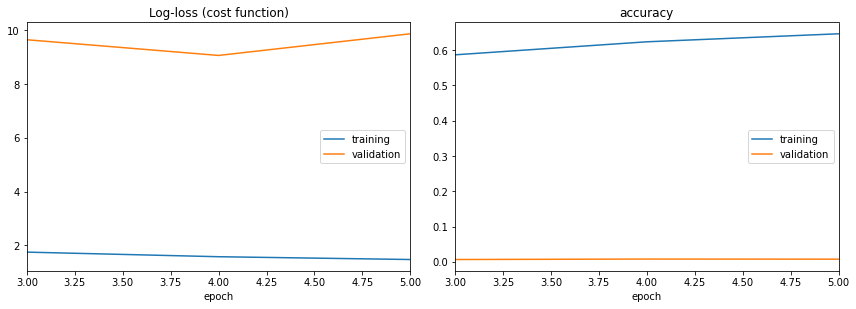

Log-loss (cost function):
training   (min:    1.475, max:    4.358, cur:    1.475)
validation (min:    8.541, max:    9.858, cur:    9.858)

accuracy:
training   (min:    0.214, max:    0.647, cur:    0.647)
validation (min:    0.004, max:    0.008, cur:    0.007)


In [80]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesCallback(),CSVLogger(TRAINING_LOGS_FILE,append=False,separator=";")],
    verbose=1)
model.save_weights(MODEL_FILE)